#### IMPORTING LIBRARYS

In [70]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot  as plt
import seaborn as sns 

from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split 
from sklearn.datasets import load_diabetes 
from sklearn.decomposition import PCA  
from  sklearn.tree import  DecisionTreeRegressor

#### LOADING AND PREPARING DATA

In [71]:
diabetes=load_diabetes() 
X=diabetes.data 
y=diabetes.target

df_diabetes=pd.DataFrame(X) 
df_diabetes["target"]=y 
df_diabetes=df_diabetes.sample(frac=1) 
df_diabetes 


,0,1,2,3,4,5,6,7,8,9,target
325,-0.001882,-0.044642,0.054152,-0.066495,0.072732,0.056619,-0.043401,0.084863,0.084495,0.048628,192.0
22,-0.085430,-0.044642,-0.004050,-0.009113,-0.002945,0.007767,0.022869,-0.039493,-0.061177,-0.013504,68.0
347,0.038076,0.050680,-0.029918,-0.074528,-0.012577,-0.012587,0.004460,-0.002592,0.003712,-0.030072,88.0
299,0.038076,0.050680,-0.013751,-0.015999,-0.035968,-0.021982,-0.013948,-0.002592,-0.025952,-0.001078,83.0
300,0.016281,-0.044642,0.073552,-0.041247,-0.004321,-0.013527,-0.013948,-0.001116,0.042896,0.044485,275.0
...,...,...,...,...,...,...,...,...,...,...,...
148,-0.060003,0.050680,0.015350,-0.019442,0.036958,0.048164,0.019187,-0.002592,-0.030751,-0.001078,96.0
231,0.009016,-0.044642,-0.030996,0.021872,0.008063,0.008707,0.004460,-0.002592,0.009436,0.011349,154.0
183,0.045341,0.050680,-0.035307,0.063187,-0.004321,-0.001627,-0.010266,-0.002592,0.015567,0.056912,185.0
403,-0.020045,-0.044642,0.097264,-0.005671,-0.005697,-0.023861,-0.021311,-0.002592,0.061686,0.040343,275.0


#### VISUALIZING DATA

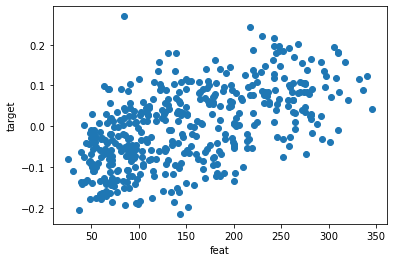

In [72]:
pca=PCA(n_components=1) 
arrayFeat=pca.fit_transform(X) 
arrayFeat=pd.DataFrame(arrayFeat) 
arrayFeat.columns= ["COMP1"]

plt.scatter(y,arrayFeat)   
plt.xlabel("feat") 
plt.ylabel("target") 
plt.show() 



#### LOADING MODEL

In [73]:
def getModel(): 
    return LinearRegression() 
    #return RandomForestRegressor() 
    #return  DecisionTreeRegressor()

## CROSS VAL

In [74]:
scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) 

R2:  0.2375715095430369


#### SEEING RESULT GRAPH

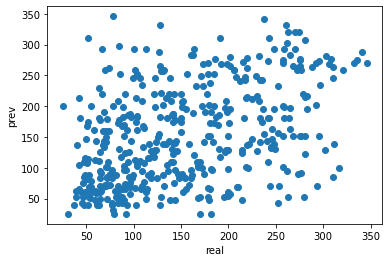

In [75]:
y_pred=cross_val_predict(getModel(),X,y,cv=10) 
plt.scatter(y,y_pred) 
plt.xlabel("real") 
plt.ylabel("prev") 
plt.show()